## S11 T01: Practicant amb training i test sets - Eduardo Baffi
### SkLearn_Train_Test

#### Descripció
Familiaritza't amb la programació científica mitjantçant la llibreria SKLearn / Scikitlearn.

### Nivell 1
#### - Exercici 1
Parteix el conjunt de dadesDelayedFlights.csv en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

Dataset Airlines Delay
- Airline on-time statistics and delay causes

Source: https://www.kaggle.com/giovamata/airlinedelaycauses

### Variable descriptions
(available here: http://stat-computing.org/dataexpo/2009/the-data.html)
     
    Name: Description
1.	Year:	             1987-2008
2.	Month:	             1-12
3.	DayofMonth:	         1-31
4.	DayOfWeek:	         1 (Monday) - 7 (Sunday)
5.	DepTime	actual:       departure time (local, hhmm)
6.	CRSDepTime:	         scheduled departure time (local, hhmm)
7.	ArrTime:	             actual arrival time (local, hhmm)
8.	CRSArrTime:	         scheduled arrival time (local, hhmm)
9.	UniqueCarrier:	     unique carrier code
10.	FlightNum:	         flight number
11.	TailNum	plane:        tail number
12.	ActualElapsedTime:	 in minutes
13.	CRSElapsedTime:	     in minutes
14.	AirTime:	             in minutes
15.	ArrDelay:	         arrival delay, in minutes
16.	DepDelay:	         departure delay, in minutes
17.	Origin:	             origin IATA airport code
18.	Dest:	             destination IATA airport code
19.	Distance:	         in miles
20.	TaxiIn	taxi:         in time, in minutes
21.	TaxiOut	taxi:         out time in minutes
22.	Cancelled:	         was the flight cancelled?
23.	CancellationCode:	 reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
24.	Diverted:	         1 = yes, 0 = no
25.	CarrierDelay:	     in minutes
26.	WeatherDelay:	     in minutes
27.	NASDelay:	         in minutes
28.	SecurityDelay:	     in minutes
29.	LateAircraftDelay:	 in minutes

* Columns description

In [3]:
flights_df = pd.read_csv('DelayedFlights2.csv')
pd.set_option('display.max_columns', None)
flights_df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [4]:
flights_df.isnull().sum()

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [5]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [6]:
# % missing values per column 
missing_data_count = flights_df.isnull().sum()
total_rows = len(flights_df.index)
missing_percent = missing_data_count/total_rows*100
missing_percent

Unnamed: 0            0.000000
Year                  0.000000
Month                 0.000000
DayofMonth            0.000000
DayOfWeek             0.000000
DepTime               0.000000
CRSDepTime            0.000000
ArrTime               0.367108
CRSArrTime            0.000000
UniqueCarrier         0.000000
FlightNum             0.000000
TailNum               0.000258
ActualElapsedTime     0.433043
CRSElapsedTime        0.010223
AirTime               0.433043
ArrDelay              0.433043
DepDelay              0.000000
Origin                0.000000
Dest                  0.000000
Distance              0.000000
TaxiIn                0.367108
TaxiOut               0.023493
Cancelled             0.000000
CancellationCode      0.000000
Diverted              0.000000
CarrierDelay         35.588855
WeatherDelay         35.588855
NASDelay             35.588855
SecurityDelay        35.588855
LateAircraftDelay    35.588855
dtype: float64

#### Source: https://aspmhelp.faa.gov/index/Types_of_Delay.html

Carrier delay is within the control of the air carrier. 

Late Arrival Delay: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport.

NAS Delay: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.

Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.

Weather Delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.

In [7]:
# Delete rows with a low % of null values:'ArrTime','TailNum','ActualElapsedTime','CRSElapsedTime','AirTime','ArrDelay',,'TaxiIn','TaxiOut'

# There are many null values in columns 'CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay' (about 35% of total). 
# For now null values are going to be replaced by zero.


flights_new = flights_df.copy()
flights_new = flights_new.dropna(axis=0, subset=['ArrTime','TailNum','ActualElapsedTime','CRSElapsedTime','AirTime','ArrDelay','TaxiIn','TaxiOut'])
flights_new = flights_new.fillna(0)
flights_new.isnull().sum()

Unnamed: 0           0
Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [8]:
flights_new.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [9]:
flights_new.drop(columns=['Unnamed: 0'], inplace=True)

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'DayofMonth'}>,
        <AxesSubplot:title={'center':'DayOfWeek'}>,
        <AxesSubplot:title={'center':'DepTime'}>],
       [<AxesSubplot:title={'center':'CRSDepTime'}>,
        <AxesSubplot:title={'center':'ArrTime'}>,
        <AxesSubplot:title={'center':'CRSArrTime'}>,
        <AxesSubplot:title={'center':'FlightNum'}>,
        <AxesSubplot:title={'center':'ActualElapsedTime'}>],
       [<AxesSubplot:title={'center':'CRSElapsedTime'}>,
        <AxesSubplot:title={'center':'AirTime'}>,
        <AxesSubplot:title={'center':'ArrDelay'}>,
        <AxesSubplot:title={'center':'DepDelay'}>,
        <AxesSubplot:title={'center':'Distance'}>],
       [<AxesSubplot:title={'center':'TaxiIn'}>,
        <AxesSubplot:title={'center':'TaxiOut'}>,
        <AxesSubplot:title={'center':'Cancelled'}>,
        <AxesSubplot:title={'center':'Diverted'}>,
        <AxesSubp

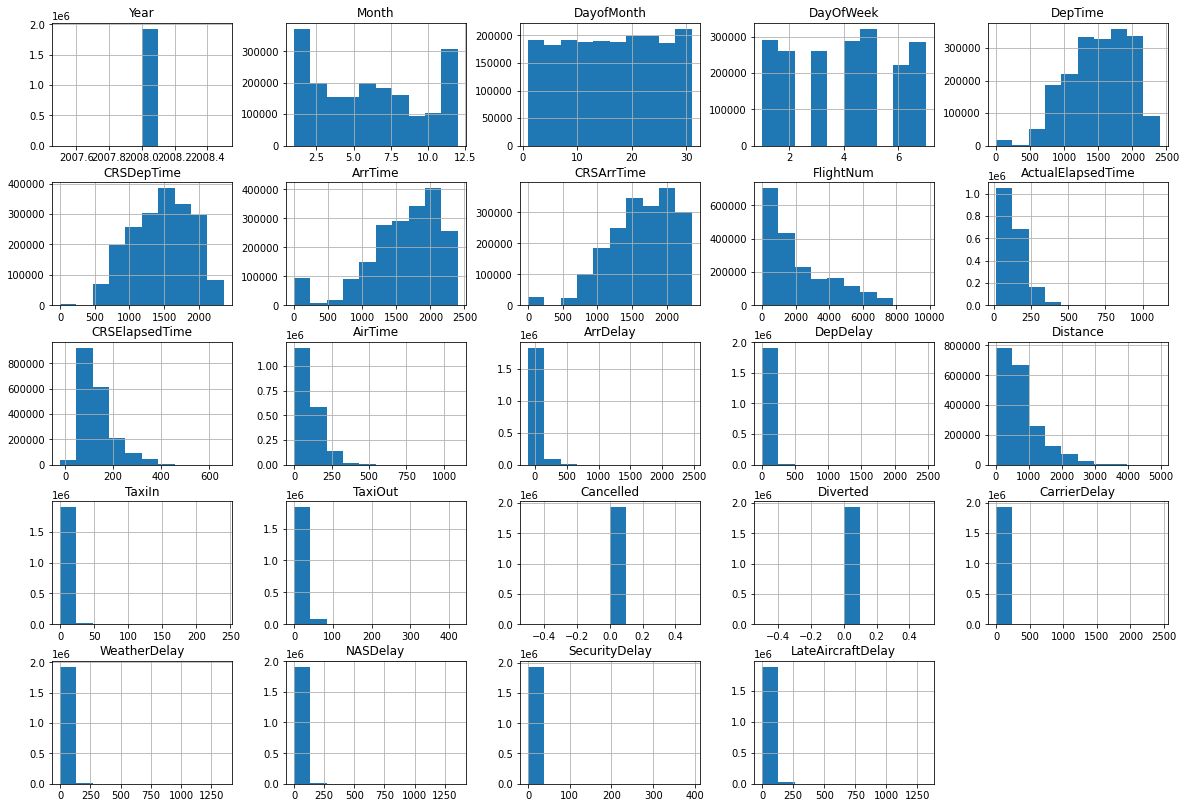

In [10]:
flights_new.hist(figsize=(20,14))

In [69]:
# The first objective is to build predictive models on tabular datasets, with only numerical features.
# In order reduce the dataset and allow that the notebook could be run locally, just few columns will not be included

numerical_columns = ['DayOfWeek', 'DepTime', 'ArrTime', 'ArrDelay',
                     'ActualElapsedTime', 'DepDelay', 'Distance']

data_numeric = flights_new[numerical_columns]
mini_data_numeric = data_numeric.sample(frac=0.15)

In [70]:
mini_data_numeric

,DayOfWeek,DepTime,ArrTime,ArrDelay,ActualElapsedTime,DepDelay,Distance
225509,4,749.0,1051.0,61.0,122.0,64.0,719
25383,7,1220.0,1341.0,86.0,81.0,85.0,345
1711652,7,2221.0,2253.0,-7.0,92.0,6.0,551
1627237,1,1547.0,1701.0,2.0,254.0,17.0,1747
552355,7,1519.0,1802.0,34.0,163.0,34.0,1189
...,...,...,...,...,...,...,...
1683408,7,1828.0,2014.0,134.0,106.0,147.0,581
598376,1,2141.0,2333.0,38.0,112.0,46.0,670
1230711,3,1912.0,2045.0,25.0,93.0,22.0,460
1083319,4,2004.0,2042.0,7.0,158.0,19.0,1090


In [71]:
target_column = 'ArrDelay'
target = mini_data_numeric[target_column]

data = mini_data_numeric.drop(columns=[target_column])

In [72]:
data

,DayOfWeek,DepTime,ArrTime,ActualElapsedTime,DepDelay,Distance
225509,4,749.0,1051.0,122.0,64.0,719
25383,7,1220.0,1341.0,81.0,85.0,345
1711652,7,2221.0,2253.0,92.0,6.0,551
1627237,1,1547.0,1701.0,254.0,17.0,1747
552355,7,1519.0,1802.0,163.0,34.0,1189
...,...,...,...,...,...,...
1683408,7,1828.0,2014.0,106.0,147.0,581
598376,1,2141.0,2333.0,112.0,46.0,670
1230711,3,1912.0,2045.0,93.0,22.0,460
1083319,4,2004.0,2042.0,158.0,19.0,1090


In [73]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.3, random_state=42)

In [74]:
data_train.describe()

,DayOfWeek,DepTime,ArrTime,ActualElapsedTime,DepDelay,Distance
count,202478.00000,202478.000000,202478.000000,202478.000000,202478.000000,202478.000000
mean,3.99074,1518.388363,1611.003437,133.339795,43.229808,765.908637
std,1.99692,450.649697,547.313576,72.123921,53.435891,575.083077
min,1.00000,1.000000,1.000000,17.000000,6.000000,31.000000
25%,2.00000,1202.000000,1316.000000,80.000000,12.000000,338.000000
50%,4.00000,1545.000000,1715.000000,116.000000,24.000000,607.000000
75%,6.00000,1901.000000,2031.000000,165.000000,53.000000,998.000000
max,7.00000,2400.000000,2400.000000,683.000000,1710.000000,4962.000000


In [75]:
data_test.describe()

,DayOfWeek,DepTime,ArrTime,ActualElapsedTime,DepDelay,Distance
count,86777.000000,86777.000000,86777.000000,86777.000000,86777.000000,86777.000000
mean,3.980605,1517.463936,1608.751167,133.318633,43.230303,765.805824
std,1.997891,449.596563,546.640650,72.100158,53.732508,575.333819
min,1.000000,1.000000,1.000000,16.000000,6.000000,31.000000
25%,2.000000,1204.000000,1317.000000,80.000000,12.000000,338.000000
50%,4.000000,1544.000000,1714.000000,116.000000,24.000000,606.000000
75%,6.000000,1858.000000,2028.000000,165.000000,53.000000,1005.000000
max,7.000000,2400.000000,2400.000000,776.000000,1597.000000,4962.000000


### Nivell 2
#### - Exercici 2
Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).


In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data_train)

StandardScaler()

In [77]:
scaler.mean_

array([   3.99073973, 1518.38836318, 1611.00343741,  133.33979494,
         43.22980768,  765.90863699])

In [78]:
scaler.scale_

array([  1.99691536, 450.64858452, 547.31222461,  72.12374329,
        53.4357586 , 575.08165675])

In [79]:
data_train_scaled = scaler.transform(data_train)
data_train_scaled

array([[-1.49767977, -1.09484059, -0.84230429, -0.67023414, -0.62186462,
        -0.66583351],
       [ 0.00463728, -0.8174626 ,  0.21741989,  1.20154891, -0.56572244,
         1.32866586],
       [-1.49767977, -0.47351389,  0.08769503,  0.56375617,  0.31383839,
         0.74961766],
       ...,
       [ 0.50540964, -1.14809717, -0.65776612, -0.32360765, -0.60315056,
        -0.05026875],
       [-0.99690742,  1.79210956, -1.80701872,  1.42338986, -0.60315056,
         2.05204139],
       [ 0.00463728,  1.30392429,  0.91354905, -0.94753533, -0.60315056,
        -0.87276064]])

In [81]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), LogisticRegression())
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [82]:
model.fit(data_train, target_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [83]:
predicted_target = model.predict(data_test)
predicted_target[:5]

array([ 12.,  56., 101.,  31.,   7.])

In [84]:
score = model.score(data_test, target_test)
print(f"The accuracy using a LogisticRegression is {score:.3f} ")

The accuracy using a LogisticRegression is 0.040 


#### Categorical variables:

In [85]:
# Now let`s practice how to encode categorical variables:

from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(flights_new)
categorical_columns

['UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'CancellationCode']

In [86]:
data_categorical = flights_new[categorical_columns]
print(f"The dataset is composed of {data_categorical.shape[1]} features")
data_categorical.head()

The dataset is composed of 5 features


,UniqueCarrier,TailNum,Origin,Dest,CancellationCode
0,WN,N712SW,IAD,TPA,N
1,WN,N772SW,IAD,TPA,N
2,WN,N428WN,IND,BWI,N
3,WN,N464WN,IND,BWI,N
4,WN,N726SW,IND,JAX,N


In [87]:
# These categorical variable does not carry any meaningful order. OrdinalEncoder does not apply in this case.
# Encoding nominal categories (without assuming any order) - OneHotEncoder:
# First,a single feature is selected ("UniqueCarrier") to test the encoding.

from sklearn.preprocessing import OneHotEncoder

carrier_column = data_categorical[["UniqueCarrier"]]

encoder = OneHotEncoder(sparse=False)
carrier_encoded = encoder.fit_transform(carrier_column)
carrier_encoded[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0.]])

In [88]:
feature_names = encoder.get_feature_names(input_features=["UniqueCarrier"])
carrier_encoded = pd.DataFrame(carrier_encoded, columns=feature_names)
carrier_encoded

,UniqueCarrier_9E,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928363,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1928364,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1928365,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1928366,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
# In order to maintain only the most relevant information, two columns will be dropped.
data_categorical.drop(columns=['TailNum', 'CancellationCode'], inplace=True)
data_categorical.head(1)

,UniqueCarrier,Origin,Dest
0,WN,IAD,TPA


In [90]:
# Apply encoding on the full dataset:

data_encoded = encoder.fit_transform(data_categorical)
data_encoded[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [91]:
print(f"The encoded dataset contains {data_encoded.shape[1]} features")

The encoded dataset contains 625 features


In [96]:
columns_encoded = encoder.get_feature_names(data_categorical.columns)
result = pd.DataFrame(data_encoded, columns=columns_encoded)
result.head()

,UniqueCarrier_9E,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,Origin_ABE,Origin_ABI,Origin_ABQ,Origin_ABY,Origin_ACK,Origin_ACT,Origin_ACV,Origin_ACY,Origin_ADK,Origin_ADQ,Origin_AEX,Origin_AGS,Origin_AKN,Origin_ALB,Origin_ALO,Origin_AMA,Origin_ANC,Origin_ASE,Origin_ATL,Origin_ATW,Origin_AUS,Origin_AVL,Origin_AVP,Origin_AZO,Origin_BDL,Origin_BET,Origin_BFL,Origin_BGM,Origin_BGR,Origin_BHM,Origin_BIL,Origin_BIS,Origin_BJI,Origin_BLI,Origin_BMI,Origin_BNA,Origin_BOI,Origin_BOS,Origin_BPT,Origin_BQK,Origin_BQN,Origin_BRO,Origin_BRW,Origin_BTM,Origin_BTR,Origin_BTV,Origin_BUF,Origin_BUR,Origin_BWI,Origin_BZN,Origin_CAE,Origin_CAK,Origin_CDC,Origin_CDV,Origin_CEC,Origin_CHA,Origin_CHO,Origin_CHS,Origin_CIC,Origin_CID,Origin_CLD,Origin_CLE,Origin_CLL,Origin_CLT,Origin_CMH,Origin_CMI,Origin_CMX,Origin_COD,Origin_COS,Origin_CPR,Origin_CRP,Origin_CRW,Origin_CSG,Origin_CVG,Origin_CWA,Origin_DAB,Origin_DAL,Origin_DAY,Origin_DBQ,Origin_DCA,Origin_DEN,Origin_DFW,Origin_DHN,Origin_DLG,Origin_DLH,Origin_DRO,Origin_DSM,Origin_DTW,Origin_EGE,Origin_EKO,Origin_ELM,Origin_ELP,Origin_ERI,Origin_EUG,Origin_EVV,Origin_EWN,Origin_EWR,Origin_EYW,Origin_FAI,Origin_FAR,Origin_FAT,Origin_FAY,Origin_FCA,Origin_FLG,Origin_FLL,Origin_FLO,Origin_FNT,Origin_FSD,Origin_FSM,Origin_FWA,Origin_GCC,Origin_GEG,Origin_GFK,Origin_GGG,Origin_GJT,Origin_GNV,Origin_GPT,Origin_GRB,Origin_GRK,Origin_GRR,Origin_GSO,Origin_GSP,Origin_GST,Origin_GTF,Origin_GTR,Origin_GUC,Origin_HDN,Origin_HHH,Origin_HLN,Origin_HNL,Origin_HOU,Origin_HPN,Origin_HRL,Origin_HSV,Origin_HTS,Origin_IAD,Origin_IAH,Origin_ICT,Origin_IDA,Origin_ILM,Origin_IND,Origin_INL,Origin_IPL,Origin_ISP,Origin_ITH,Origin_ITO,Origin_IYK,Origin_JAC,Origin_JAN,Origin_JAX,Origin_JFK,Origin_JNU,Origin_KOA,Origin_KTN,Origin_LAN,Origin_LAS,Origin_LAW,Origin_LAX,Origin_LBB,Origin_LCH,Origin_LEX,Origin_LFT,Origin_LGA,Origin_LGB,Origin_LIH,Origin_LIT,Origin_LMT,Origin_LNK,Origin_LRD,Origin_LSE,Origin_LWB,Origin_LWS,Origin_LYH,Origin_MAF,Origin_MBS,Origin_MCI,Origin_MCN,Origin_MCO,Origin_MDT,Origin_MDW,Origin_MEI,Origin_MEM,Origin_MFE,Origin_MFR,Origin_MGM,Origin_MHT,Origin_MIA,Origin_MKE,Origin_MKG,Origin_MLB,Origin_MLI,Origin_MLU,Origin_MOB,Origin_MOD,Origin_MOT,Origin_MQT,Origin_MRY,Origin_MSN,Origin_MSO,Origin_MSP,Origin_MSY,Origin_MTJ,Origin_MYR,Origin_OAJ,Origin_OAK,Origin_OGG,Origin_OKC,Origin_OMA,Origin_OME,Origin_ONT,Origin_ORD,Origin_ORF,Origin_OTH,Origin_OTZ,Origin_OXR,Origin_PBI,Origin_PDX,Origin_PFN,Origin_PHF,Origin_PHL,Origin_PHX,Origin_PIA,Origin_PIH,Origin_PIR,Origin_PIT,Origin_PLN,Origin_PMD,Origin_PNS,Origin_PSC,Origin_PSE,Origin_PSG,Origin_PSP,Origin_PUB,Origin_PVD,Origin_PWM,Origin_RAP,Origin_RDD,Origin_RDM,Origin_RDU,Origin_RFD,Origin_RHI,Origin_RIC,Origin_RKS,Origin_RNO,Origin_ROA,Origin_ROC,Origin_ROW,Origin_RST,Origin_RSW,Origin_SAN,Origin_SAT,Origin_SAV,Origin_SBA,Origin_SBN,Origin_SBP,Origin_SCC,Origin_SCE,Origin_SDF,Origin_SEA,Origin_SFO,Origin_SGF,Origin_SGU,Origin_SHV,Origin_SIT,Origin_SJC,Origin_SJT,Origin_SJU,Origin_SLC,Origin_SLE,Origin_SMF,Origin_SMX,Origin_SNA,Origin_SPI,Origin_SPS,Origin_SRQ,Origin_STL,Origin_STT,Origin_STX,Origin_SUN,Origin_SUX,Origin_SWF,Origin_SYR,Origin_TEX,Origin_TLH,Origin_TOL,Origin_TPA,Origin_TRI,Origin_TUL,Origin_TUP,Origin_TUS,Origin_TVC,Origin_TWF,Origin_TXK,Origin_TYR,Origin_TYS,Origin_VLD,Origin_VPS,Origin_WRG,Origin_WYS,Origin_XNA,Origin_YAK,Origin_YKM,Origin_YUM,Dest_ABE,Dest_ABI,Dest_ABQ,Dest_ABY,Dest_ACK,Dest_ACT,Dest_ACV,Dest_ACY,Dest_ADK,Dest_ADQ,Dest_AEX,Dest_AGS,Dest_AKN,Dest_ALB,Dest_ALO,Dest_AMA,Dest_ANC,Dest_ASE,Dest_ATL,Dest_ATW,Dest_AUS,Dest_AVL,Dest_AVP,Dest_AZO,Dest_BDL,Dest_BET,Dest_BFL,Dest_BGM,Dest_BGR,Dest_BHM,Dest_BIL,Dest_BIS,Dest_BJI,Dest_BLI,Dest_BMI,Dest_BNA,De

In [97]:
result.UniqueCarrier_9E.value_counts()

0.0    1876800
1.0      51568
Name: UniqueCarrier_9E, dtype: int64

In [101]:
flights_new.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

#### Numerical and categorical variables together:

In [102]:
# Using numerical and categorical variables together

complete_data = flights_new.copy()

#Maintain relevant columns

filtered_columns = ['DayOfWeek', 'DepTime',
       'ArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance']

filtered_df = flights_new[filtered_columns].sample(frac=0.05)

target_column = 'ArrDelay'
target = filtered_df[target_column]

data = filtered_df.drop(columns=[target_column])

In [103]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)

In [104]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

In [105]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard-scaler', numerical_preprocessor, numerical_columns)])

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))

In [107]:
from sklearn import set_config
set_config(display='diagram')
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['UniqueCarrier', 'TailNum',
                                                   'Origin', 'Dest']),
                                                 ('standard-scaler',
                                                  StandardScaler(),
                                                  ['DayOfWeek', 'DepTime',
                                                   'ArrTime', 'FlightNum',
                                                   'ActualElapsedTime',
                                                   'AirTime', 'DepDelay',
                                                   'Distance'])])),
                ('logisticregression', LogisticRegression(max_iter=500))])

In [108]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=1)

In [109]:
_ = model.fit(data_train, target_train)

In [110]:
data_test.head()

,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,AirTime,DepDelay,Origin,Dest,Distance
1171184,2,1957.0,2356.0,WN,118,N509SW,119.0,102.0,7.0,PHX,SAT,843
782931,4,2205.0,2343.0,OO,2642,N468CA,38.0,22.0,20.0,MKE,GRR,120
1304991,6,1650.0,1721.0,YV,1006,N77302,31.0,20.0,10.0,OGG,HNL,100
1347192,1,1535.0,1657.0,DL,1087,N649DL,262.0,233.0,15.0,ATL,LAS,1747
516437,6,654.0,858.0,NW,664,N319US,124.0,106.0,10.0,MSP,MEM,700


In [111]:
model.predict(data_test)[:5]

array([ 3., 25.,  9., 10.,  6.])

In [112]:
target_test[:5]

1171184     1.0
782931     18.0
1304991     9.0
1347192    23.0
516437      8.0
Name: ArrDelay, dtype: float64

In [113]:
model.score(data_test, target_test)

0.033063679734494915

### Nivell 3
#### - Exercici 3
Resumeix les noves columnes generades de manera estadística i gràfica

In [98]:
# Using the results of the analysis with NUMERICAL features above, the new columns can be summarized:
data_train_scaled = pd.DataFrame(data_train_scaled, columns=data_train.columns)
data_train_scaled.describe()

,DayOfWeek,DepTime,ArrTime,ActualElapsedTime,DepDelay,Distance
count,2.024780e+05,2.024780e+05,2.024780e+05,2.024780e+05,2.024780e+05,2.024780e+05
mean,1.424749e-17,1.171382e-16,-6.620170e-17,-1.521253e-16,1.894987e-18,-7.850157e-17
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-1.497680e+00,-3.367121e+00,-2.941654e+00,-1.613058e+00,-6.967209e-01,-1.277920e+00
25%,-9.969074e-01,-7.020734e-01,-5.390039e-01,-7.395594e-01,-5.844365e-01,-7.440833e-01
50%,4.637285e-03,5.905186e-02,1.900132e-01,-2.404173e-01,-3.598678e-01,-2.763236e-01
75%,1.006182e+00,8.490244e-01,7.673802e-01,4.389706e-01,1.828400e-01,4.035798e-01
max,1.506954e+00,1.956317e+00,1.441584e+00,7.621072e+00,3.119204e+01,7.296514e+00


array([[<AxesSubplot:title={'center':'DayOfWeek'}>,
        <AxesSubplot:title={'center':'DepTime'}>],
       [<AxesSubplot:title={'center':'ArrTime'}>,
        <AxesSubplot:title={'center':'ActualElapsedTime'}>],
       [<AxesSubplot:title={'center':'DepDelay'}>,
        <AxesSubplot:title={'center':'Distance'}>]], dtype=object)

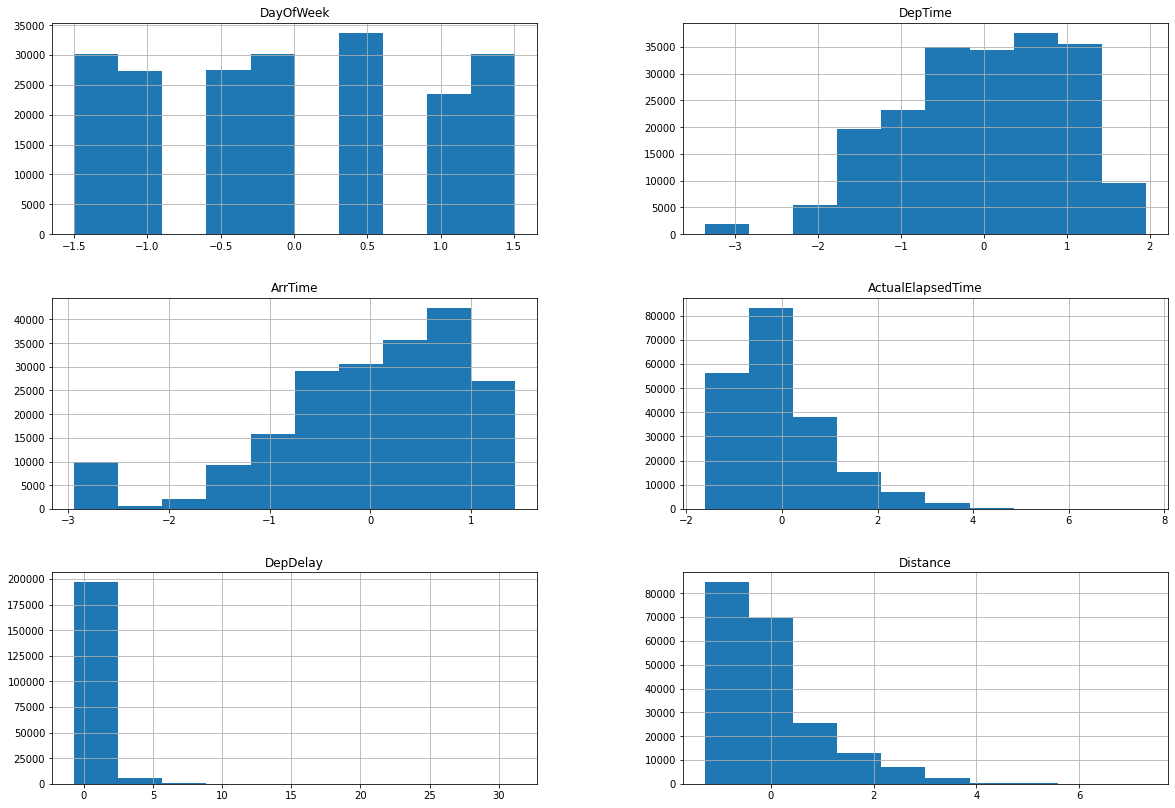

In [114]:
data_train_scaled.hist(figsize=(20,14))

The plots of the train set after StandardScaler are quite similar to the original data, which can be seen above.

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

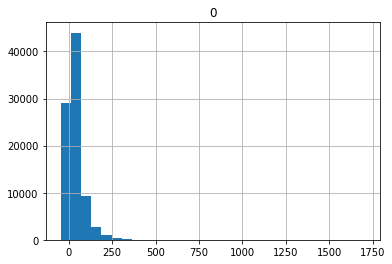

In [120]:
# Results of the target after the predict model:
predicted_target = pd.DataFrame(predicted_target)

predicted_target.hist(bins=30)

In [117]:
predicted_target.describe()

,0
count,86777.000000
mean,37.041244
std,46.638046
min,-46.000000
25%,8.000000
50%,21.000000
75%,46.000000
max,1707.000000


<AxesSubplot:>

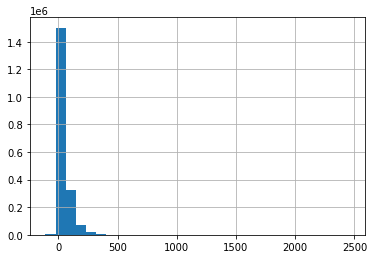

In [121]:
# Original data of the target feature:
flights_new.ArrDelay.hist(bins=30)

In [122]:
flights_new.ArrDelay.describe()

count    1.928368e+06
mean     4.219977e+01
std      5.678447e+01
min     -1.090000e+02
25%      9.000000e+00
50%      2.400000e+01
75%      5.600000e+01
max      2.461000e+03
Name: ArrDelay, dtype: float64

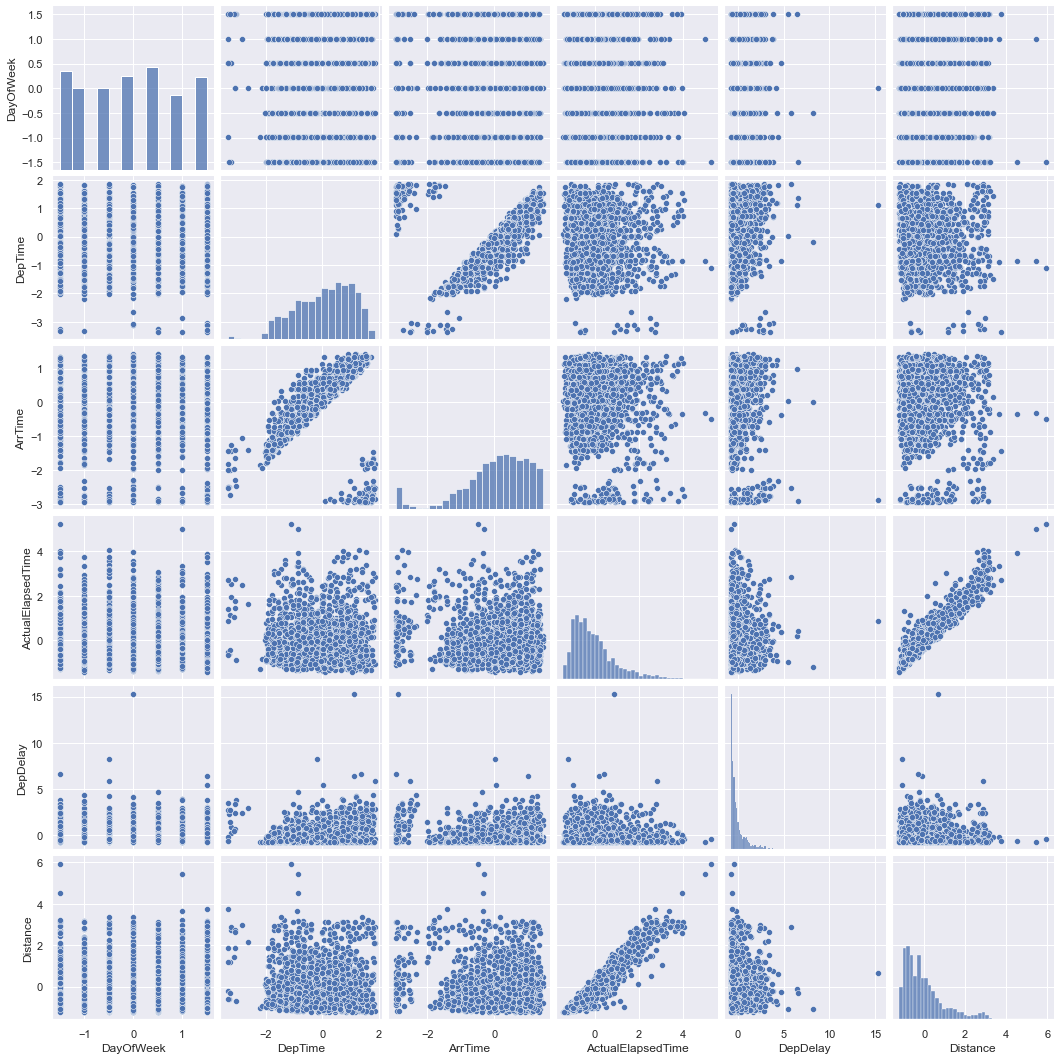

In [140]:
# Correlation matrix
import seaborn as sns

scaled_plot = data_train_scaled.sample(frac=0.01) # Used a reduced dataframe in order to allow a fast plot.

sns.pairplot(scaled_plot)
plt.show()

# The plots allow to analyse the relationship between each pair of numeric variables of a matrix.
# The correlation is visualised as multiple scatterplots. The diagonal represents the distribution of each variable with a histogram or a density plot.

Some variables have a clear relationship (e.g. ArrTime X DepTime). In many others the correlation is not clear visually.

In [124]:
# Using the results of the analysis with CATEGORICAL features above:
# The encoded dataset of three categocial features after using OneHotEncoder contains 625 features. 
# Because of the high number of features, the result of one of then will be shown to exemplify the resuts: "UniqueCarrier"

carrier_encoded.describe()

,UniqueCarrier_9E,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV
count,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06
mean,2.674178e-02,9.900081e-02,3.858185e-04,2.022954e-02,2.848263e-02,5.171783e-02,5.897629e-02,4.239958e-02,1.463621e-02,3.680262e-02,3.874779e-03,7.323447e-02,4.088587e-02,2.719968e-02,6.833758e-02,7.306904e-02,5.082381e-02,1.950878e-01,5.348927e-02,3.462462e-02
std,1.613278e-01,2.986632e-01,1.963848e-02,1.407846e-01,1.663472e-01,2.214568e-01,2.355804e-01,2.014991e-01,1.200916e-01,1.882769e-01,6.212702e-02,2.605210e-01,1.980258e-01,1.626649e-01,2.523244e-01,2.602499e-01,2.196378e-01,3.962684e-01,2.250071e-01,1.828272e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
# Using numerical and categorical variables together

In [125]:
# Target results
target_test.describe()

count    24105.000000
mean        42.678531
std         58.034094
min        -55.000000
25%          9.000000
50%         25.000000
75%         57.000000
max       1707.000000
Name: ArrDelay, dtype: float64

<AxesSubplot:>

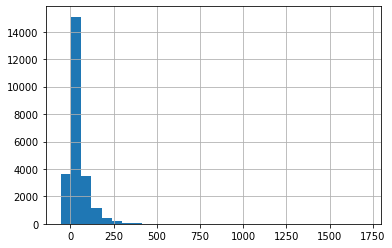

In [127]:
target_test.hist(bins=30)

In [129]:
target_test = pd.DataFrame(target_test)
target_test.head()

,ArrDelay
1171184,1.0
782931,18.0
1304991,9.0
1347192,23.0
516437,8.0


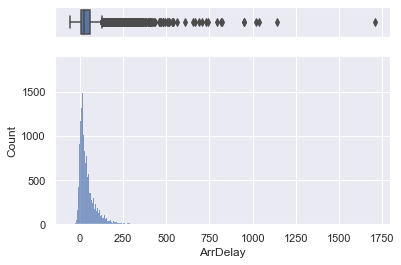

In [133]:
# Histogram and a boxplot on top 
sns.set(style="darkgrid")

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(target_test["ArrDelay"], ax=ax_box)
sns.histplot(data=target_test, x="ArrDelay", ax=ax_hist)

ax_box.set(xlabel='')
plt.show()